## Writeback vs Write-through strategy

Here we are comparing write back write allocate with write through no write allocate.

When write through is being used, the blocks are never in a dirty state since they are always concistant with the layer below. This is the reason the AMAT read is lower when the write through strategy is used. However, when the write back startegy is used, when there is a cache hit, there is no need to write to the next level. This leads to a smaller AMAT write value for the write back strategy.

In [11]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
from glob import glob

results = {}
tempList = []
strategies = ['WB', 'WT']
for strategy in strategies:
    for f_name in glob('../cache_config/results/WB_WT_Comparaison/' + strategy + '/*.json'):
        with open(f_name) as f:
            tempList.append(json.load(f))
    results[strategy] = copy.deepcopy(tempList)
    tempList = []

In [12]:
def average(results, keyword):
    avrg = 0    
    for result in results:
        avrg += result[keyword]
        
    return avrg / len(results)
    

# Define the name of the variables of interest
interest_var = ['amat', 'amat_read', 'amat_write']
amat_results = {}

for var in interest_var:
    amat_results[var] = []
    for strategy in strategies:
        amat_results[var].append(average(results[strategy], var))
    amat_results[var] = tuple(amat_results[var])

amat values:
	amat_WB = 9.66627140974967 cycles
	amat_WT = 10.342138779095302 cycles

amat_read values:
	amat_read_WB = 9.457568796630904 cycles
	amat_read_WT = 8.695987524628586 cycles

amat_write values:
	amat_write_WB = 15.856060606060607 cycles
	amat_write_WT = 65.0 cycles



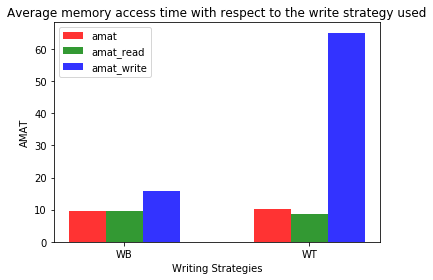

In [13]:
# data to plot
n_groups = len(strategies)
colors = ['r', 'g', 'b']
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

count = 0
for var in interest_var:
    print(var + " values:")
    for strategy in strategies:
        print('\t' + var + '_' + strategy + " = " + str(amat_results[var][strategies.index(strategy)]) + ' cycles')
    plt.bar(index + count * bar_width, amat_results[var], bar_width,
        alpha=opacity,
        color=colors[count],
        label=var)
    count += 1
    print()

plt.xlabel('Writing Strategies')
plt.ylabel('AMAT')
plt.title('Average memory access time with respect to the write strategy used')
plt.xticks(index + bar_width, strategies)
plt.legend()
 
plt.tight_layout()
plt.show()